In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

def line_cda(x1, x2, y1, y2):
    out = Image.new("RGB", (100, 100), (255, 255, 255))
    draw = ImageDraw.Draw(out)
    steps = max(abs(x2 - x1), abs(y2 - y1))
    dx = (x2 - x1) / steps
    # dx=1
    dy =abs (y2 - y1) / steps
    x = x1
    y = y1
    pixels = np.zeros((steps, 2))
    i=0
    for i in range (steps):
    # while x<=x2:
        draw.point((x,100-y),fill=(0,0,0))
        pixels[i] = [x,y] 
        x += dx
        y += dy
        # i+=1
        

    plt.scatter(pixels[:, 0], pixels[:, 1], marker='s', color='black', s=100)
    plt.show()
    out.show()




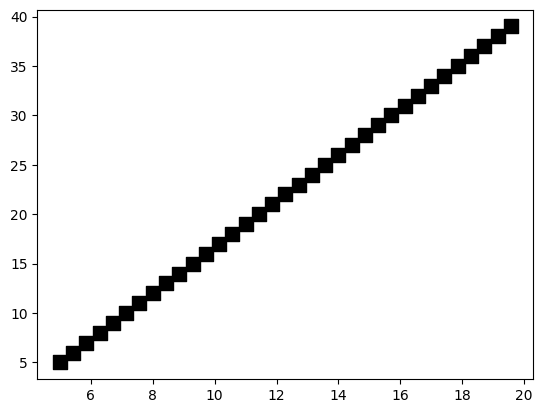

In [9]:
line_cda(5, 20, 5, 40)

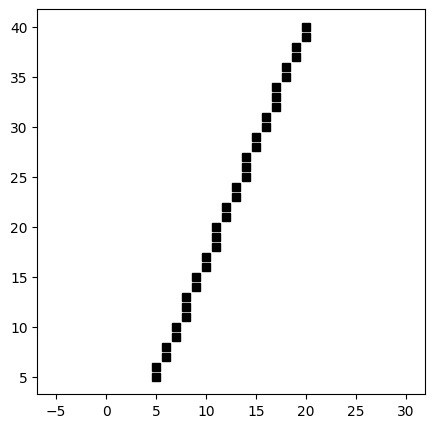

In [11]:


def line_bresenham(x0, x1, y0, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = -1 if x0 > x1 else 1
    sy = -1 if y0 > y1 else 1
    points = []
    out = Image.new("RGB", (100, 100), (255, 255, 255))
    draw = ImageDraw.Draw(out)
    if dx > dy:
        d = 2 * dy - dx
        while x0 != x1:
            points.append((x0, y0))
            draw.point((round(x0),100 - round(y0)), fill = (0,0,0))
            if d < 0:
                d += 2 * dy
                x0 += sx
            else:
                d += 2 * (dy - dx)
                x0 += sx
                y0 += sy
        points.append((x1, y1))
        draw.point((round(x1),100 - round(y1)), fill = (0,0,0))
    else:
        d = 2 * dx - dy
        while y0 != y1:
            points.append((x0, y0))
            draw.point((round(x0),100 - round(y0)), fill = (0,0,0))
            if d < 0:
                d += 2 * dx
                y0 += sy
            else:
                d += 2 * (dx - dy)
                x0 += sx
                y0 += sy
        points.append((x1, y1))
        draw.point((round(x0),100 - round(y0)), fill = (0,0,0))
    out.show()
    return points

points = line_bresenham(20, 5, 40, 5)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal', adjustable='datalim')

for point in points:
    ax.plot(*point, 'sk')
plt.show()





In [16]:

def circle_bresenham(x0,y0,R):
    x=0
    y=R
    lim=0
    d=1-2*R
    points=[]
    out = Image.new("RGB", (200, 200), (255, 255, 255))
    draw = ImageDraw.Draw(out)
    points.append((x0,y0))
    while (y>=lim):
        points.append((x+x0,y+y0))
        points.append((x+x0,y0-y))
        points.append((-x+x0,-y+y0))
        points.append((-x+x0,y+y0))
        draw.point((100-x0 + x, 100-y0 + y), fill=(0, 0, 0))
        draw.point((100-x0 - x, 100-y0 + y), fill=(0, 0, 0))
        draw.point((100-x0 + x, 100-y0 - y), fill=(0, 0, 0))
        draw.point((100-x0 - x, 100-y0 - y), fill=(0, 0, 0))
        draw.point((100-x0 + y, 100-y0 + x), fill=(0, 0, 0))
        draw.point((100-x0 - y, 100-y0 + x), fill=(0, 0, 0))
        draw.point((100-x0 + y, 100-y0 - x), fill=(0, 0, 0))
        draw.point((100-x0 - y,100-y0 - x), fill=(0, 0, 0))
        if d<0:
            sig=2*d+2*y-1
            if sig<=0:
                x+=1
                d+=2*x+1
            else:
                x+=1
                y-=1
                d+=2*x-2*y+2
        else:
            s=2*d-2*x-1
            if s>0:
                y-=1
                d-=2*y+1
            else:
                x+=1
                y-=1
                d+=2*x-2*y+2
        # if d < 0:
        #     d = d + 4 * x + 6
        # else:
        #     d = d + 4 * (x - y) + 10
        #     y = y - 1

        # x = x + 1

    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect('equal', adjustable='datalim')

    for point in points:
        ax.plot(*point, 'sk')
    
    plt.show()
    out.show()




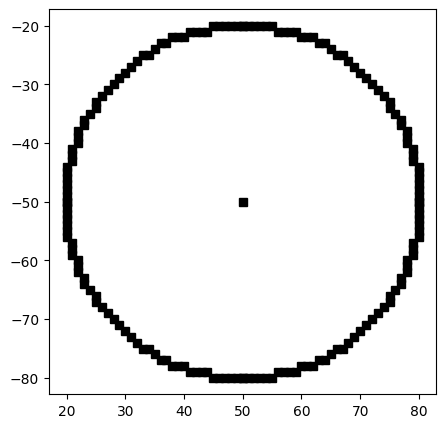

In [21]:
circle_bresenham(50,-50,30)

In [19]:
def circle_simple(x0,y0,R):
    points=[]
    points.append((x0,y0))
    
    x=0
    out = Image.new("RGB", (200, 200), (255, 255, 255))
    draw = ImageDraw.Draw(out)
    draw.point((x0, y0), fill=(0, 0, 0))
    while x<= (R/np.sqrt(2)):
        y=int(np.sqrt(R**2-x**2))
        points.append((x+x0,y+y0))
        points.append((y+x0,y0+x))
        points.append((y+x0,-x+y0))
        points.append((x+x0,-y+y0))
        points.append((-x+x0,-y+y0))
        points.append((-y+x0,y0-x))
        points.append((-y+x0,x+y0))
        points.append((-x+x0,y+y0))
        draw.point((100-x0 + x, 100-y0 + y), fill=(0, 0, 0))
        draw.point((100-x0 - x, 100-y0 + y), fill=(0, 0, 0))
        draw.point((100-x0 + x, 100-y0 - y), fill=(0, 0, 0))
        draw.point((100-x0 - x, 100-y0 - y), fill=(0, 0, 0))
        draw.point((100-x0 + y, 100-y0 + x), fill=(0, 0, 0))
        draw.point((100-x0 - y, 100-y0 + x), fill=(0, 0, 0))
        draw.point((100-x0 + y, 100-y0 - x), fill=(0, 0, 0))
        draw.point((100-x0 - y,100-y0 - x), fill=(0, 0, 0))
        x+=1
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect('equal', adjustable='datalim')

    for point in points:
        ax.plot(*point, 'sk')
    plt.show()
    out.show()



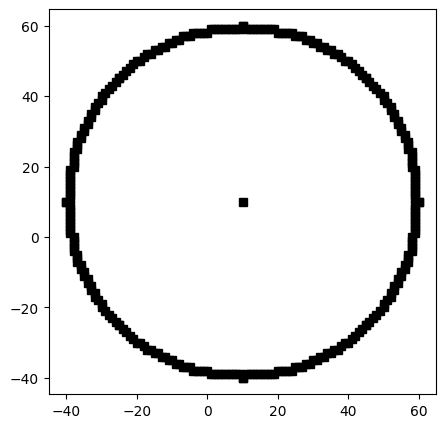

In [20]:
circle_simple(10,10,50)